#PROGRAM STATEMENT
>Write a program to implement Decision Tree Classification on given data set to design a model that can predict whether the player will play on a given day on the basis of the provided features.

#CODE

In [ ]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny',
         'Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild',
      'Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes',
      'No']

humidity=['High','High','High','High','Normal','Normal','Normal','High','Normal',
          'Normal','Normal','High','Normal','High']

wind=['Wind','Strong','Wind','Wind','Wind','Strong','Strong','Wind','Wind','Wind',
      'Strong','Strong','Wind','Strong']

import pandas as pd
df = pd.DataFrame(list(zip(weather, temp, humidity, wind, play)),
               columns =['Weather', 'Temp', 'Humidity', 'Wind', 'Play'])

#Dataset
df

,Weather,Temp,Humidity,Wind,Play
0,Sunny,Hot,High,Wind,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Wind,Yes
3,Rainy,Mild,High,Wind,Yes
4,Rainy,Cool,Normal,Wind,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Wind,No
8,Sunny,Cool,Normal,Wind,Yes
9,Rainy,Mild,Normal,Wind,Yes


In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
temp_encoded=le.fit_transform(temp)
humidity_encoded = le.fit_transform(humidity)
wind_encoded = le.fit_transform(wind)
target=le.fit_transform(play)

In [ ]:
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [ ]:
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [ ]:
print(humidity_encoded)

[0 0 0 0 1 1 1 0 1 1 1 0 1 0]


In [ ]:
print(wind_encoded)

[1 0 1 1 1 0 0 1 1 1 0 0 1 0]


In [ ]:
print(target)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
import numpy as np
zipped=zip(weather_encoded,temp_encoded,humidity_encoded,wind_encoded)
features = np.array(list(zipped)).tolist()
print(features)


[[2, 1, 0, 1], [2, 1, 0, 0], [0, 1, 0, 1], [1, 2, 0, 1], [1, 0, 1, 1], [1, 0, 1, 0], [0, 0, 1, 0], [2, 2, 0, 1], [2, 0, 1, 1], [1, 2, 1, 1], [2, 2, 1, 0], [0, 2, 0, 0], [0, 1, 1, 1], [1, 2, 0, 0]]


In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.10)


from sklearn import tree

#Create a Decision Tree Classifier
model = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model using the training sets
model.fit(X_train, y_train)

# Test the model using test set
y_pred = model.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix  
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[0 1]
 [0 1]]


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


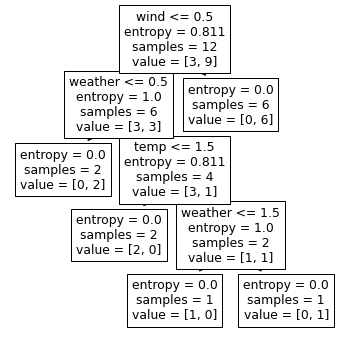

In [ ]:
#Print Decision Tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6)) #figsize value changes the size of plot
tree.plot_tree(model,ax=ax,feature_names=['weather','temp','humidity','wind'])
plt.show()

In [39]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Decision Tree.ipynb')

# DISCUSSION